# Basic Data

In [1]:
import pandas as pd
import numpy as np

In [2]:
train = pd.read_excel('Data_Train.xlsx')
test = pd.read_excel('Test_set.xlsx')

In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [4]:
train.head(5)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [5]:
train.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


In [6]:
train.value_counts('Airline')

Airline
Jet Airways                          3849
IndiGo                               2053
Air India                            1752
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
dtype: int64

In [7]:
train.value_counts('Destination')

Destination
Cochin       4537
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
dtype: int64

In [8]:
train.value_counts('Additional_Info')

Additional_Info
No info                         8345
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
1 Short layover                    1
2 Long layover                     1
Red-eye flight                     1
dtype: int64

In [9]:
test.head(5)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


# Data Visualization

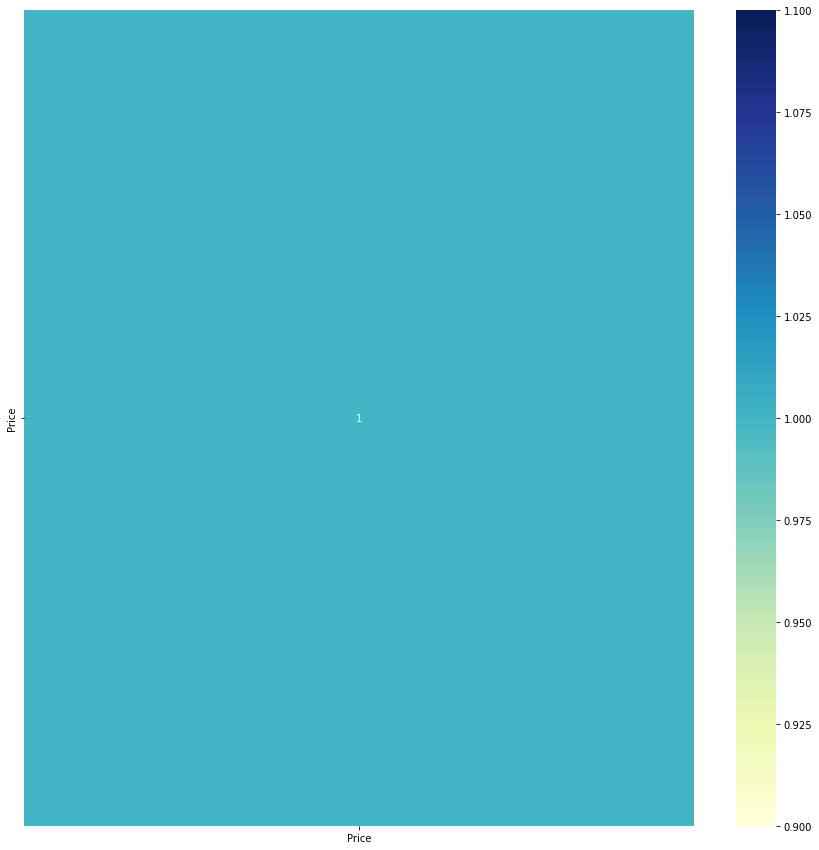

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

%matplotlib inline 

corr = train.corr()
top_corr_features = corr.index[abs(corr["Price"])>0.00001]

plt.figure(figsize=(15,15))
g=sns.heatmap(train[top_corr_features].corr(),annot=True,cmap="YlGnBu")

<Figure size 1080x576 with 0 Axes>

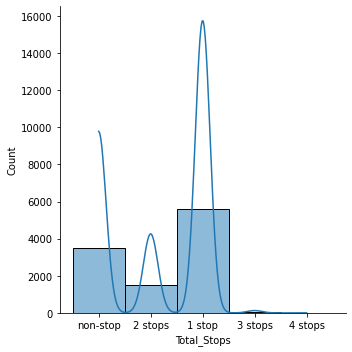

In [18]:
plt.figure(figsize=(15,8))
sns.displot(x ='Total_Stops',kde=True, data=train)

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<Figure size 1440x864 with 0 Axes>

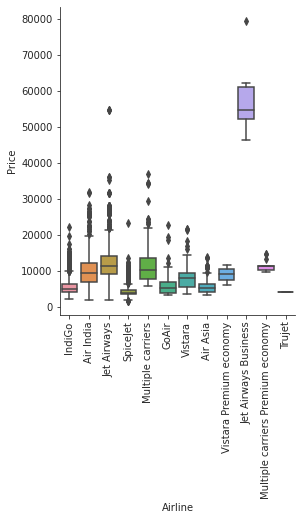

In [19]:
plt.figure(figsize=(20,12))
with sns.axes_style(style='ticks'):    
    g = sns.factorplot("Airline", "Price", data=train, kind="box")
    plt.xticks(rotation=90)
    g.set_axis_labels("Airline", "Price");

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<Figure size 1440x864 with 0 Axes>

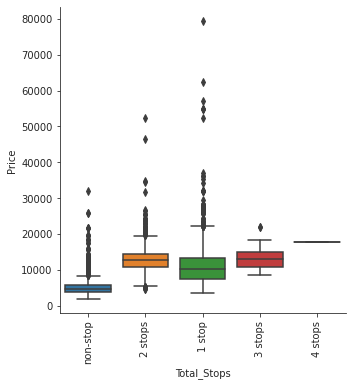

In [20]:
plt.figure(figsize=(20,12))
with sns.axes_style(style='ticks'):    
    g = sns.factorplot("Total_Stops", "Price", data=train, kind="box")
    plt.xticks(rotation=90)
    g.set_axis_labels("Total_Stops", "Price");

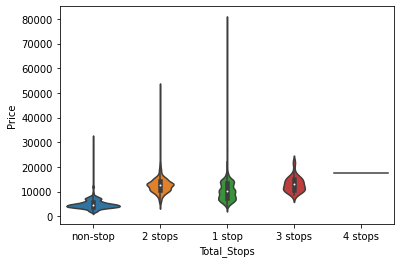

In [21]:
sns.violinplot(x = train['Total_Stops'], y = train['Price'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


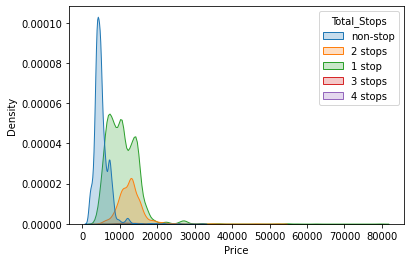

In [24]:
sns.kdeplot(x = 'Price' , data = train ,hue = 'Total_Stops', color = 'black', shade=True)

In [25]:
n = train.nunique(axis=0)  
print("No.of.unique values in each column :\n", n)

No.of.unique values in each column :
 Airline              12
Date_of_Journey      44
Source                5
Destination           6
Route               128
Dep_Time            222
Arrival_Time       1343
Duration            368
Total_Stops           5
Additional_Info      10
Price              1870
dtype: int64


# **Feature Engineering**

Finding and eliminating null/NaN/blank data

In [26]:
def missing_percent_of_column(train_set):
    nan_percent = 100*(train_set.isnull().sum()/len(train_set))
    nan_percent = nan_percent[nan_percent>0].sort_values(ascending=False).round(1)
    DataFrame = pd.DataFrame(nan_percent)
    # Rename the columns
    mis_percent_table = DataFrame.rename(columns = {0 : '% of Misiing Values'}) 
    # Sort the table by percentage of missing descending
    mis_percent = mis_percent_table
    return mis_percent

In [27]:
miss = missing_percent_of_column(train)
miss

,% of Misiing Values
Route,0.0
Total_Stops,0.0


In [28]:
train= train.dropna(axis=0, subset=['Total_Stops'])

Handling date and time columns

In [29]:
#Transform string to date
train['Date_of_Journey'] = pd.to_datetime(train.Date_of_Journey)
test['Date_of_Journey'] = pd.to_datetime(test.Date_of_Journey)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [30]:
#Extracting Month
train['weekday_name'] = train['Date_of_Journey'].dt.weekday
test['weekday_name'] = train['Date_of_Journey'].dt.weekday

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [31]:
def WeekVsWEnd(day):
  if day < 5:
    return 1
  else:
    return 2

In [32]:
#Extracting Month
train['weekday_name'] = train['weekday_name'].apply(WeekVsWEnd)
test['weekday_name'] = train['weekday_name'].apply(WeekVsWEnd)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [33]:
#Extracting Month
train['month'] = train['Date_of_Journey'].dt.month
test['month'] = test['Date_of_Journey'].dt.month

#Extracting Month
train['day'] = train['Date_of_Journey'].dt.day
test['day'] = test['Date_of_Journey'].dt.day


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


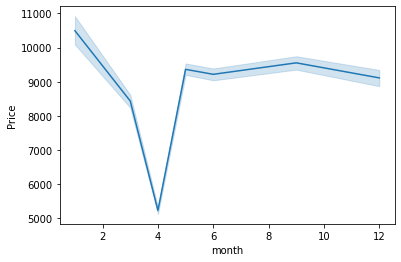

In [34]:
sns.lineplot(x = 'month',y = 'Price' , data = train)

In [35]:
def ConvertToMin(duration):
  time = duration.split(' ')
  total_tm = 0
  for tm in range(len(time)):
    if time[tm][-1] == 'h':
      total_tm += int(time[tm][:-1]) * 60
    elif time[tm][-1] == 'm':
      total_tm += int(time[tm][:-1])
  return total_tm

In [36]:
train['Duration_min'] = train['Duration'].apply(ConvertToMin)
test['Duration_min'] = test['Duration'].apply(ConvertToMin)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [37]:
train.sort_values('Duration_min').head(5)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,weekday_name,month,day,Duration_min
6474,Air India,2019-06-03,Mumbai,Hyderabad,BOM → GOI → PNQ → HYD,16:50,16:55,5m,2 stops,No info,17327,1,6,3,5
4806,Air India,2019-03-04,Mumbai,Hyderabad,BOM → HYD,19:30,20:45,1h 15m,non-stop,No info,2050,1,3,4,75
10297,Air India,2019-05-27,Mumbai,Hyderabad,BOM → HYD,19:30,20:45,1h 15m,non-stop,No info,3100,1,5,27,75
7392,Air India,2019-01-03,Mumbai,Hyderabad,BOM → HYD,19:30,20:45,1h 15m,non-stop,No info,15385,1,1,3,75
7759,Air India,2019-03-03,Mumbai,Hyderabad,BOM → HYD,19:30,20:45,1h 15m,non-stop,No info,11185,2,3,3,75


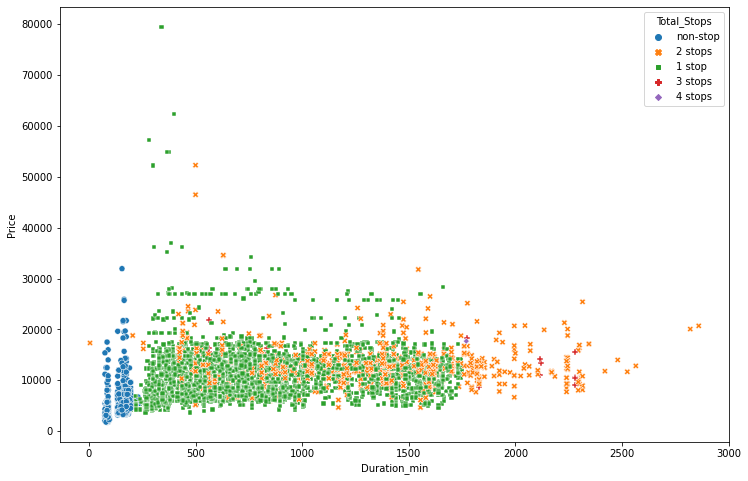

In [38]:
plt.figure(figsize=(12,8))
sns.scatterplot(data=train, x="Duration_min", y="Price", hue="Total_Stops", style="Total_Stops")

<Figure size 864x432 with 0 Axes>

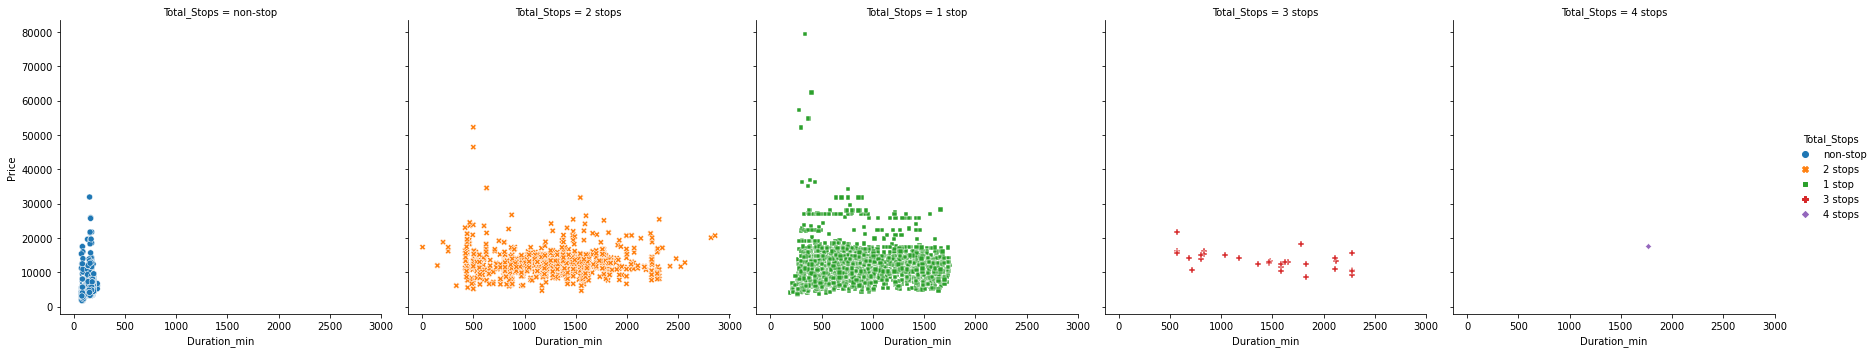

In [39]:
plt.figure(figsize=(12,6))
sns.relplot(data=train, x="Duration_min", y="Price", col="Total_Stops", hue="Total_Stops", style="Total_Stops", kind="scatter")

In [40]:
train= train[train['Duration_min'] > 5]

In [41]:
def ConvertFlightTime(duration):
  time = duration.split(':')
  total_tm = 0
  total_tm = (int(time[0]) * 60) + int(time[1])
  return total_tm

In [42]:
train['Dep_Time_min'] = train['Dep_Time'].apply(ConvertFlightTime)
test['Dep_Time_min'] = test['Dep_Time'].apply(ConvertFlightTime)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [43]:
train['Arrival_Time_min'] = train['Dep_Time_min'] + train['Duration_min']
test['Arrival_Time_min'] =  test['Dep_Time_min'] + test['Duration_min']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


Outliers

In [44]:
train = train[train['Price'] < 30000]

In [45]:
train = train[train['Duration_min'] < 2500] 

Binning

In [46]:
stops =  {'non-stop':1,'1 stop':2,'2 stops':3,'3 stops':4,'4 stops':5}
train['Total_Stops'] = train['Total_Stops'].map(stops)
test['Total_Stops'] = test['Total_Stops'].map(stops)

In [47]:
from sklearn import preprocessing
 
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()

In [48]:
train['Additional_Info'] = train['Additional_Info'].str.replace('No info','No Info')
test['Additional_Info'] =  test['Additional_Info'].str.replace('No info','No Info')

train['Additional_Info']= label_encoder.fit_transform(train['Additional_Info'])
test['Additional_Info']= label_encoder.fit_transform(test['Additional_Info'])

In [49]:
train['Airline'] = np.where(train['Airline']=='Vistara Premium economy', 'Vistara', train['Airline'])
train['Airline'] = np.where(train['Airline']=='Jet Airways Business', 'Jet Airways', train['Airline'])
train['Airline'] = np.where(train['Airline']=='Multiple carriers Premium economy', 'Multiple carriers', train['Airline'])

test['Airline'] = np.where(test['Airline']=='Vistara Premium economy', 'Vistara', test['Airline'])
test['Airline'] = np.where(test['Airline']=='Jet Airways Business', 'Jet Airways', test['Airline'])
test['Airline'] = np.where(test['Airline']=='Multiple carriers Premium economy', 'Multiple carriers', test['Airline'])

In [50]:
train['Airline']= label_encoder.fit_transform(train['Airline'])
test['Airline']= label_encoder.fit_transform(test['Airline'])

In [51]:
train['Source']= label_encoder.fit_transform(train['Source'])
test['Source']= label_encoder.fit_transform(test['Source'])

In [52]:
train['Destination']= label_encoder.fit_transform(train['Destination'])
test['Destination']= label_encoder.fit_transform(test['Destination'])

In [53]:
from sklearn.preprocessing import OneHotEncoder
# data is a Pandas DataFrame

jobs_encoder = OneHotEncoder()
#train = pd.get_dummies(train,prefix=['Source'], columns = ['Source'])
#test = pd.get_dummies(test,prefix=['Source'], columns = ['Source'])

#train = pd.get_dummies(train,prefix=['Destination'], columns = ['Destination'])
#test = pd.get_dummies(test,prefix=['Destination'], columns = ['Destination'])

In [54]:
train = train.drop(['Date_of_Journey','Route','Dep_Time','Arrival_Time','Duration'],axis=1)
test = test.drop(['Date_of_Journey','Route','Dep_Time','Arrival_Time','Duration'],axis=1)

In [55]:
train['Dep_Time_min']=train['Dep_Time_min']/100
test['Dep_Time_min']=test['Dep_Time_min']/100

train['Arrival_Time_min']=train['Arrival_Time_min']/100
test['Arrival_Time_min']=test['Arrival_Time_min']/100

train['Duration_min']=train['Duration_min']/100
test['Duration_min']=test['Duration_min']/100

In [56]:
train.head(5)

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,weekday_name,month,day,Duration_min,Dep_Time_min,Arrival_Time_min
0,3,0,5,1,6,3897,2,3,24,1.70,13.40,15.10
1,1,3,0,3,6,7662,2,1,5,4.45,3.50,7.95
2,4,2,1,3,6,13882,1,9,6,11.40,5.65,17.05
3,3,3,0,2,6,6218,1,12,5,3.25,10.85,14.10
4,3,0,5,2,6,13302,1,1,3,2.85,10.10,12.95


# CatBoost

In [57]:
X_train, Y_train =  train.drop('Price', axis = 1) , train['Price']
X_test = test

In [ ]:
from sklearn.model_selection import GridSearchCV
from catboost import CatBoostRegressor

#Instantiate CatBoostClassifier
cbr = CatBoostRegressor()

#create the grid
grid = {'max_depth': [3,4,5,6],'n_estimators':[100, 200, 300],'learning_rate': [0.05,0.1, 0.2,0.3,0.4,0.5]}

#Instantiate GridSearchCV
gscv = GridSearchCV (estimator = cbr, param_grid = grid, scoring ='accuracy', cv = 5)

#fit the model
gscv.fit(X_train, Y_train)

#returns the estimator with the best performance
print(gscv.best_estimator_)

#returns the best score
print(gscv.best_score_)

#returns the best parameters
print(gscv.best_params_)

In [ ]:
from catboost import CatBoostRegressor

#Instantiate CatBoostClassifier
cbr = CatBoostRegressor()

model=CatBoostRegressor(n_estimators=100, depth=3, learning_rate=0.05, loss_function='RMSE')

# Fit model
model.fit(X_train, Y_train)
# Get predictions
y_pred = model.predict(X_test)


#Create a  DataFrame with the passengers ids and our prediction
submission = pd.DataFrame({'Price':y_pred})

#Visualize the first 5 rows
submission.head()

#Convert DataFrame to a csv file that can be uploaded
#This is saved in the same directory as your notebook
filename = 'FlightPrice.csv'

submission.to_csv(filename,index=False)

print('Saved file: ' + filename)

Custom logger is already specified. Specify more than one logger at same time is not thread safe.

0:	learn: 4165.2745798	total: 2.86ms	remaining: 283ms
1:	learn: 4050.1177593	total: 4.61ms	remaining: 226ms
2:	learn: 3950.0404519	total: 6.3ms	remaining: 204ms
3:	learn: 3847.8733929	total: 8.9ms	remaining: 214ms
4:	learn: 3755.3075592	total: 11ms	remaining: 209ms
5:	learn: 3669.7322774	total: 13.1ms	remaining: 206ms
6:	learn: 3588.9545394	total: 15.5ms	remaining: 207ms
7:	learn: 3510.3825391	total: 17.5ms	remaining: 201ms
8:	learn: 3438.6327638	total: 19.2ms	remaining: 194ms
9:	learn: 3372.0502874	total: 21.1ms	remaining: 190ms
10:	learn: 3308.2881810	total: 23.3ms	remaining: 188ms
11:	learn: 3248.4328913	total: 25.7ms	remaining: 189ms
12:	learn: 3193.6044697	total: 27.6ms	remaining: 185ms
13:	learn: 3143.6208747	total: 29.5ms	remaining: 181ms
14:	learn: 3095.7813800	total: 31.3ms	remaining: 177ms
15:	learn: 3057.3214027	total: 33.1ms	remaining: 174ms
16:	learn: 3017.3109172	total: 35ms	remaining: 171ms
17:	learn: 2980.1195303	total: 39.5ms	remaining: 180ms
18:	learn: 2945.2576322	to

# Model parameter fine tuning

In [59]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(train.drop('Price', axis = 1) , train['Price'], test_size = 0.3, random_state = 0)

In [60]:
X_train.head(5)

,Airline,Source,Destination,Total_Stops,Additional_Info,weekday_name,month,day,Duration_min,Dep_Time_min,Arrival_Time_min
8556,5,2,1,2,5,1,6,3,7.55,7.80,15.35
3510,5,2,1,2,6,1,5,27,7.35,5.25,12.60
6625,3,3,0,1,6,1,12,4,1.50,8.65,10.15
9198,1,0,5,3,6,1,3,21,16.25,4.95,21.20
5518,3,3,0,1,6,1,6,18,1.55,2.80,4.35


In [61]:
from sklearn import datasets, linear_model


# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(X_train, Y_train)

# Make predictions using the testing set
y_pred = regr.predict(X_test)

In [62]:
acc_reg = round(regr.score(X_train, Y_train) * 100, 2)
acc_reg

48.38

In [63]:
from sklearn.linear_model import BayesianRidge

BayReg = linear_model.BayesianRidge(n_iter=500,alpha_1=0.001)
BayReg.fit(X_train, Y_train)

y_pred_b = BayReg.predict(X_test)

acc_BayReg = round(BayReg.score(X_train, Y_train) * 100, 2)
acc_BayReg

48.41

In [64]:
import xgboost as xgb
from xgboost import plot_tree
xgb_model = xgb.XGBRegressor(subsample = 0.2,  learning_rate=0.01, max_depth=4, n_estimators=700).fit(X_train, Y_train)
print("Performance on train data:", xgb_model.score(X_train, Y_train))

[09:03:30] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Performance on train data: 0.8631401336824541


## XGB Hyperparameter Tuning

# Model Submission

In [65]:
X_train, Y_train =  train.drop('Price', axis = 1) , train['Price']
X_test = test

In [66]:
import xgboost as xgb
from xgboost import plot_tree
xgb_model = xgb.XGBRegressor(subsample = 0.7,min_child_weight=8,  learning_rate=0.2, max_depth=20, n_estimators=200).fit(X_train, Y_train)
print("Performance on train data:", xgb_model.score(X_train, Y_train))

[09:03:47] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Performance on train data: 0.9927968327792057


In [67]:
y_pred = xgb_model.predict(X_test)

In [68]:
import time
timestr = time.strftime("%Y%m%d-%H%M%S")

In [69]:
#Create a  DataFrame with the passengers ids and our prediction
submission = pd.DataFrame({'Price':y_pred})

#Visualize the first 5 rows
submission.head()

#Convert DataFrame to a csv file that can be uploaded
#This is saved in the same directory as your notebook
filename = 'FlightTicketPrice'+timestr+ '.csv'

submission.to_csv(filename,index=False)

print('Saved file: ' + filename)

Saved file: FlightTicketPrice20220223-090404.csv
